## Load dataset

Dataset <a href="https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)">ILPD (Indian Liver Patient Dataset</a> yang terdiri dari 11 fitur/kolom.

__Attribute Information:__

1. __Age__ : Age of the patient
2. __Gender__ : Gender of the patient
3. __TB__ : Total Bilirubin
4. __DB__ : Direct Bilirubin
5. __Alkphos__ : Alkaline Phosphotase
6. __Sgpt__ : Alamine Aminotransferase
7. __Sgot__ : Aspartate Aminotransferase
8. __TP__ : Total Protiens
9. __ALB__ : Albumin
10. __A/G__ : Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts) 

<i>import</i> <i>library</i> yang dibutuhkan yaitu Pandas, Numpy, Matplotlib, dan  Scipy untuk proses penambahan <i>'best fit' line</i>.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

plt.style.use('fivethirtyeight')

<i>load</i> dataset __ILPD__ dengan <i>method</i> <code>read_csv()</code> dan beri parameter <code>header=None</code> karena dataset ini belum ada <i>header</i>-nya.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset

df = pd.read_csv("Indian-Liver-Patient-Dataset-(ILPD).csv", header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
# Membuat list nama kolom
column_names = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G', 'Label']

# Mengubah nama kolom
df.columns = column_names
df.head(10)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


## Visualisasi data dengan Histogram

__Histogram__ adalah jenis visualisasi data untuk merepresentasikan distribusi frekuensi dari dataset numerik. Sumbu X merepresentasikan bin dari <i>data point</i>, sedangkan sumbu Y merepresentasikan frekuensi atau banyaknya <i>data point</i> pada setiap bin. Ukuran bin dapat disesuaikan agar distribusinya terlihat bagus. Namun, <i>default</i>-nya Python akan membagi menjadi 10 bin.

### Mendapatkan rentang bin dan frekuensinya dengan Numpy

cek terlebih dahulu rentang bin dan masing-masing frekuensinya dengan menggunakan <i>method</i> dari Numpy yaitu <code>histogram()</code>. Melihat distribusi frekuensi dari kolom <code>Age</code>.

In [6]:
# Mendapatkan rentang bin dan frekuensinya

count, bin_edges = np.histogram(df['Age'])

print(count)     # menampilkan jumlah frekuensi tiap bin
print(bin_edges) # rentang bin, default = 10

[ 10  38  57 114  97 109  81  53  21   3]
[ 4.  12.6 21.2 29.8 38.4 47.  55.6 64.2 72.8 81.4 90. ]


<code>np.histogram</code> akan mengembalikan dua nilai, oleh karena itu harus didefinisikan dua variabel untuk menyimpan hasilnya, variabel <code>count</code> dan <code>bin_edges</code>. Setelah itu, <code>print()</code> untuk melihat hasil rentang bin dan frekuensinya.

Mendefinisikan jumlah bin, Python akan otomatis membaginya menjadi 10 bin. Namun, jika ingin kurang atau lebih dari 10 bin, dapat menambahkan parameter <code>bins</code> dan memberikan nilai berupa integer sesuai yang diinginkan seperti di bawah ini.

In [7]:
# Mendapatkan rentang bin dan frekuensinya dengan mendefinisikan jumlah bin

count, bin_edges = np.histogram(df['Age'], bins=15)

print(count)     # menampilkan jumlah frekuensi tiap bin
print(bin_edges) # rentang bin, default = 10

[ 6 11 31 36 59 76 56 78 72 64 47 23 21  1  2]
[ 4.          9.73333333 15.46666667 21.2        26.93333333 32.66666667
 38.4        44.13333333 49.86666667 55.6        61.33333333 67.06666667
 72.8        78.53333333 84.26666667 90.        ]


tambahkan parameter <code>bins = 15</code> sehingga Python akan membaginya menjadi 15 bin.

### Plotting Histogram dengan Matplotlib

Ada dua cara yang dapat digunakan, yaitu dengan <i>method</i> <code>hist()</code> dari Matplotlib atau <i>method</i> <code>plot()</code> dari Pandas dengan mendefinisikan <code>kind = 'hist'</code>.

Pertama membuat Histogram dengan <code>hist()</code>. Perhatikan kode di bawah ini.

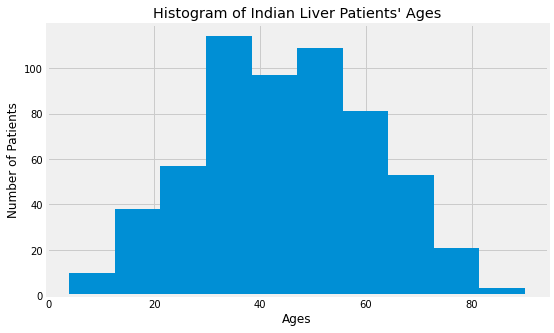

In [8]:
# Membuat histogram dengan hist()

plt.figure(figsize=(8,5))
plt.hist(df['Age'])     # Membuat histogram

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 
plt.show()

gunakan <i>method</i> <code>plot()</code> dari Pandas seperti di bawah ini.

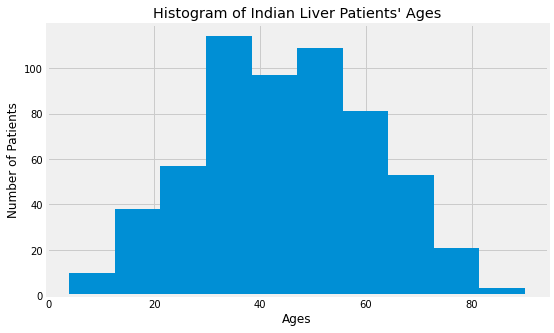

In [9]:
# Membuat histogram dengan plot()

df['Age'].plot(kind='hist', figsize=(8, 5))

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 

plt.show()

dua cara tersebut menghasilkan plot histogram yang sama persis.


### Mengatur jumlah bin

Jika tidak ingin membagi bin menjadi 10, maka harus mendefinisikan sendiri jumlah binnya menggunakan parameter <code>bins</code>. Misalnya pada contoh di bawah ini, kita ingin menvisualisasikan histogram dari kolom <code>Age</code> dengan 15 bin.

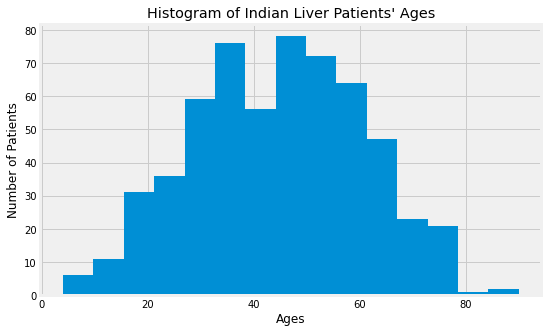

In [10]:
# Membuat histogram dengan hist() dan mengatur jumlah bin

plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15)     # Membuat histogram

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 
plt.show()

Cara yang sama dalam mengatur bin juga dapat diterapkan pada pembuatan histogram dengan <i>method</i> <code>plot()</code>.

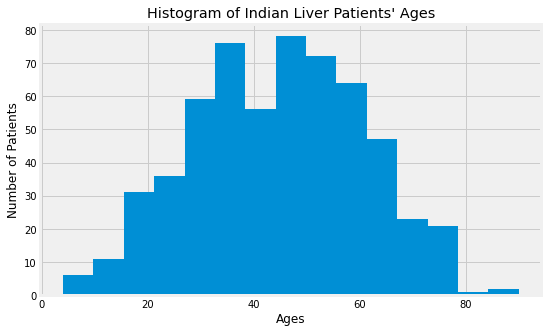

In [11]:
# Membuat histogram dengan 15 bin

df['Age'].plot(kind='hist', figsize=(8, 5), bins=15)

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 

plt.show()

### Mengatur xticks

Histogram di atas label __xticks__-nya ditempatkan bukan pada batasan tiap bin. Atur label <i>xticks</i> tersebut dengan parameter <code>xticks</code> dengan memberi nilai <code>xticks = bin_edges</code>.

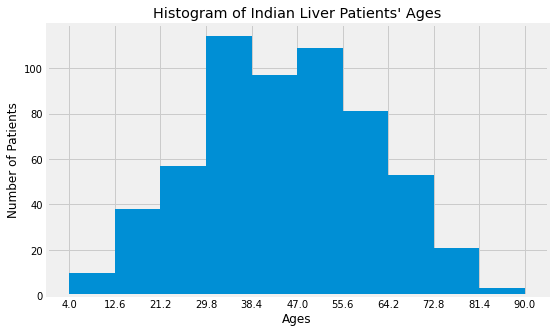

In [12]:
# Mengatur label xticks

count, bin_edges = np.histogram(df['Age'])

df['Age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 

plt.show()

Bagaimana jika jumlah bin-nya ingin selain dari <i>default</i>-nya yakni 10?

Jika seperti itu, pada <code>np.histogram()</code> harus didefinisikan dahulu <code>bins</code>-nya, dan juga saat visualisasi data dengan <code>plot()</code> atau <code>hist()</code> jumlah bin-nya didefinisikan lagi.

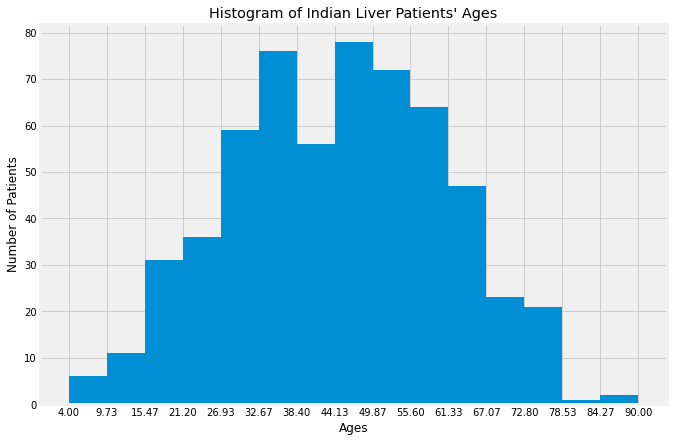

In [13]:
# Mengatur bin dan label xticks

count, bin_edges = np.histogram(df['Age'], bins=15)

df['Age'].plot(kind='hist', figsize=(10, 7), bins=15, xticks=bin_edges)

plt.title("Histogram of Indian Liver Patients' Ages") 
plt.ylabel('Number of Patients') 
plt.xlabel('Ages') 

plt.show()

### Menambahkan 'best fit' line

Untuk menambahkan <i>'best fit' line</i>, membutuhkan <i>library</i> <code>spipy.stats</code> untuk menampilkan distribusi data. Perhatikan kode berikut.

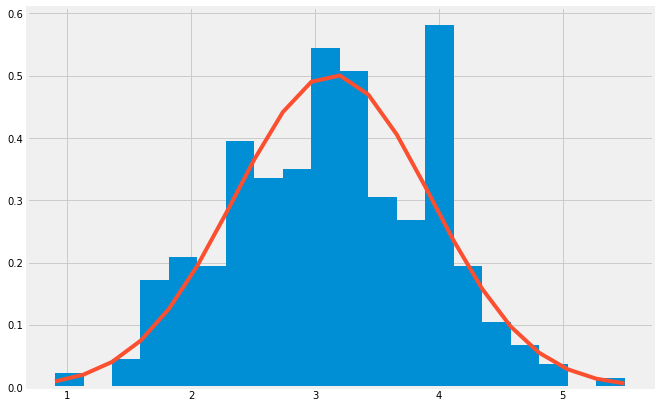

In [14]:
# Menambahkan 'best fit' line pada histogram

plt.figure(figsize=(10,7))
n, bins, pathes = plt.hist(df['ALB'], 20, density=True)

mu, sigma = scipy.stats.norm.fit(df['ALB'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line)
plt.show()

Dalam contoh di atas, menggunakan <code>scipy.stats.norm.fit()</code> untuk <i>fitting</i> distribusi normal ke histogram. Sementara itu, <code>scipy.stats.norm.pdf()</code> digunakan untuk menghitung <i>probability density function</i>-nya. Setelah itu, plotkan sebagai <i>line plot</i>.

ubah-ubah warna dan jenis garisnya seperti di bawah ini.

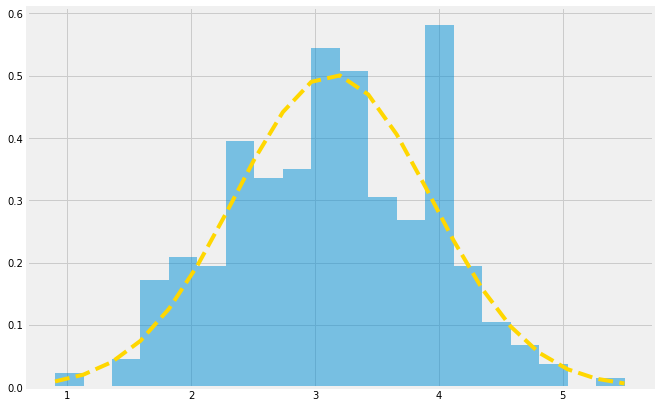

In [15]:
# Mengubah warna dan jenis garis distribusi normal

plt.figure(figsize=(10,7))
n, bins, pathes = plt.hist(df['ALB'], 20, density=True, alpha=0.5)

mu, sigma = scipy.stats.norm.fit(df['ALB'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

plt.plot(bins, best_fit_line, '--', color='gold')
plt.show()

## Multiple Histogram dalam satu plot

<i>Plotting</i> lebih dari satu histogram ke dalam satu plot yang sama terkadang diperlukan untuk perbandingan. Misal ingin menempatkan histogram dari kolom <code>TP</code> dan <code>ALB</code>.

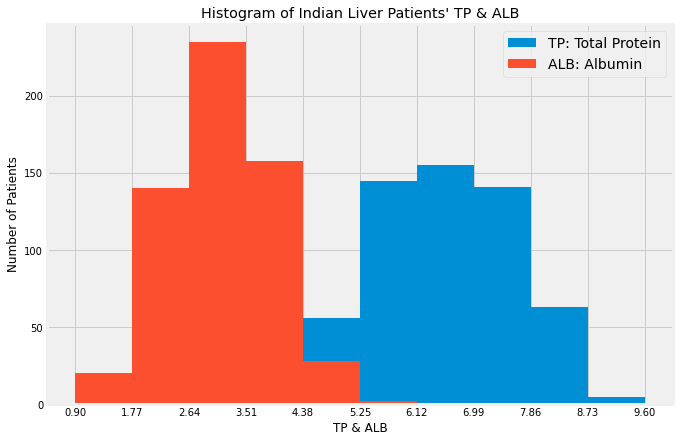

In [16]:
# Membuat multiple histogram dalam satu plot

count, bin_edges = np.histogram(df[['TP', 'ALB']])

df[['TP', 'ALB']].plot(kind='hist', figsize=(10, 7), xticks=bin_edges)

plt.title("Histogram of Indian Liver Patients' TP & ALB") 
plt.ylabel('Number of Patients') 
plt.xlabel('TP & ALB') 
plt.legend(['TP: Total Protein', 'ALB: Albumin'], fontsize=14)

plt.show()

Dua histogram tersebut saling tumpang tindih. Atur transparansinya untuk melihat batas dari masing-masing histogram.

### Mengatur transparansi dan warna

Gunakan parameter <code>alpha</code> untuk mengatur transparansi. Selain itu, dapat juga mengubah warna sesuai keinginan dengan menggunakan parameter <code>color</code>. Perhatikan kode berikut.

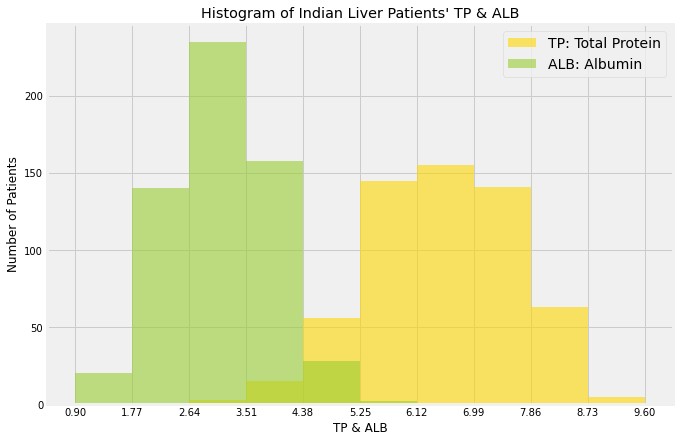

In [17]:
# Mengatur transparansi dan warna

count, bin_edges = np.histogram(df[['TP', 'ALB']])

df[['TP', 'ALB']].plot(kind='hist', 
                       figsize=(10, 7), 
                       xticks=bin_edges,
                       alpha=0.6,
                       color=['gold', 'yellowgreen'])

plt.title("Histogram of Indian Liver Patients' TP & ALB") 
plt.ylabel('Number of Patients') 
plt.xlabel('TP & ALB') 
plt.legend(['TP: Total Protein', 'ALB: Albumin'], fontsize=14)

plt.show()

### Menyesuaikan min dan max label x-axis

Menyesuaikan min dan max label x-axis maksudnya menyesuaikan jarak dari nilai minimum histogram atau nilai bin terkecil, dalam kasus ini __0.90__, dengan batas <i>figure</i> kiri, serta jarak nilai maksimum histogram atau nilai bin terbesar, dalam kasus ini __9.60__, dengan batas <i>figure</i> kanan.

Definisikan jarak yang diinginkan, misal definisikan dalam variabel <code>xmin</code> dan <code>xmax</code>. Setelah itu, tambahkan parameter <code>xlim</code> untuk mengaplikasikan jarak yang sudah diatur tersebut. Perhatikan kode berikut.

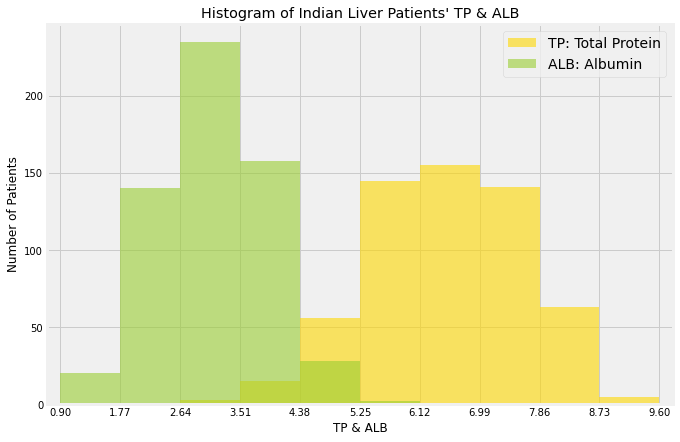

In [18]:
# Menyesuaikan min dan max label xticks

count, bin_edges = np.histogram(df[['TP', 'ALB']])
xmin = bin_edges[0] - 0.2     # mengatur ruas kosong antara ujung figure kiri dan bin terkecil sebesar 0.2 
xmax = bin_edges[-1] + 0.2    # mengatur ruas kosong antara ujung figure kanan dan bin terbesar sebesar 0.2

df[['TP', 'ALB']].plot(kind='hist', 
                       figsize=(10, 7), 
                       xticks=bin_edges,
                       alpha=0.6,
                       color=['gold', 'yellowgreen'],
                       xlim=(xmin, xmax))      # menambahkan parameter xlim untuk mengaplikasikan nilai xmin dan xmax        

plt.title("Histogram of Indian Liver Patients' TP & ALB") 
plt.ylabel('Number of Patients') 
plt.xlabel('TP & ALB') 
plt.legend(['TP: Total Protein', 'ALB: Albumin'], fontsize=14)

plt.show()

Sekarang ruas kosong antara ujung <i>figure</i> dengan bin terkecil dan terbesarnya menjadi lebih mengecil dari sebelumnya.

### Stacked histogram

Jika tidak ingin membuat histogram yang saling tumpang tindih, buat histogram yang bersusun atau <i>stacked histogram</i> dengan menambahkan parameter <code>stacked = True</code>. Perhatikan kode berikut.

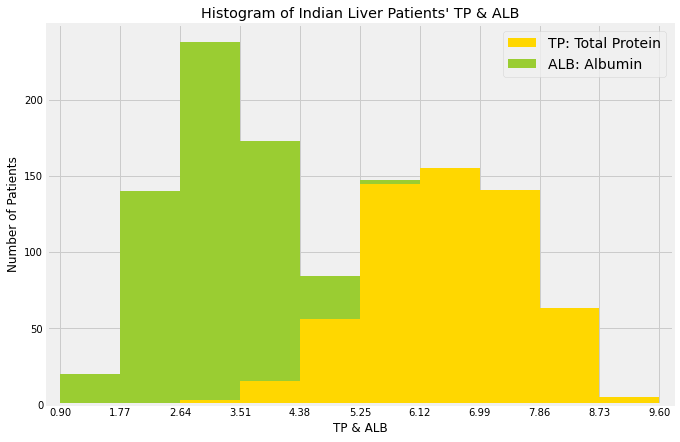

In [19]:
count, bin_edges = np.histogram(df[['TP', 'ALB']])
xmin = bin_edges[0] - 0.2     # mengatur ruas kosong antara ujung figure kiri dan bin terkecil sebesar 0.2 
xmax = bin_edges[-1] + 0.2    # mengatur ruas kosong antara ujung figure kanan dan bin terbesar sebesar 0.2

df[['TP', 'ALB']].plot(kind='hist', 
                       figsize=(10, 7), 
                       xticks=bin_edges,
                       color=['gold', 'yellowgreen'],
                       xlim=(xmin, xmax),
                       stacked=True)

plt.title("Histogram of Indian Liver Patients' TP & ALB") 
plt.ylabel('Number of Patients') 
plt.xlabel('TP & ALB') 
plt.legend(['TP: Total Protein', 'ALB: Albumin'], fontsize=14)

plt.show()

## Subplots

Subplots ini tidak hanya dapat digunakan untuk histogram, namun juga bisa digunakan untuk jenis visualisasi data lainnya. Jadi misal ingin membuat subplots yang terdiri dari berbagai jenis plot juga sangat memungkinkan.

Membuat subplots yang terdiri dari 6 histogram dari berbagai kolom di dataframe <code>df</code>. Misal ingin membuat histogram untuk kolom <code>TB</code>, <code>DB</code>, <code>Sgpt</code>, <code>Sgot</code>, <code>TP</code>, dan <code>ALB</code>. Perhatikan kode berikut.

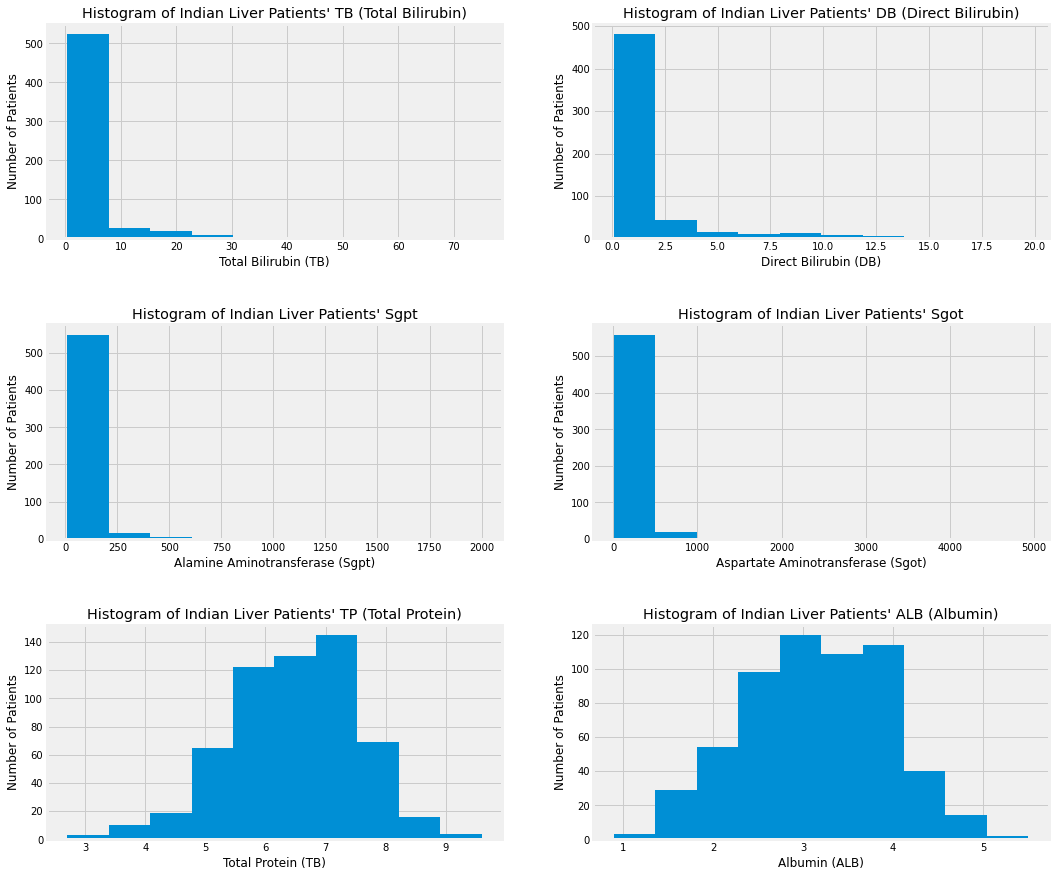

In [20]:
# Membuat subplot

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(16, 15)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[1,0])  
ax3 = fig.add_subplot(ax[1,1]) 
ax4 = fig.add_subplot(ax[2,0])  
ax5 = fig.add_subplot(ax[2,1])  

# Subplot ax[0,0]: TB
df['TB'].plot(kind='hist', ax=ax0)
ax0.set_title("Histogram of Indian Liver Patients' TB (Total Bilirubin)")
ax0.set_ylabel('Number of Patients')
ax0.set_xlabel('Total Bilirubin (TB)')

# Subplot ax[0,1]: DB
df['DB'].plot(kind='hist', ax=ax1) 
ax1.set_title("Histogram of Indian Liver Patients' DB (Direct Bilirubin)")
ax1.set_ylabel('Number of Patients')
ax1.set_xlabel('Direct Bilirubin (DB)')

# Subplot ax[1,0]: Sgpt
df['Sgpt'].plot(kind='hist', ax=ax2) 
ax2.set_title("Histogram of Indian Liver Patients' Sgpt")
ax2.set_ylabel('Number of Patients')
ax2.set_xlabel('Alamine Aminotransferase (Sgpt)') 

# Subplot ax[1,1]: Sgot
df['Sgot'].plot(kind='hist', ax=ax3) 
ax3.set_title("Histogram of Indian Liver Patients' Sgot")
ax3.set_ylabel('Number of Patients')
ax3.set_xlabel('Aspartate Aminotransferase (Sgot)')

# Subplot ax[2,0]: TP
df['TP'].plot(kind='hist', ax=ax4) 
ax4.set_title("Histogram of Indian Liver Patients' TP (Total Protein)")
ax4.set_ylabel('Number of Patients')
ax4.set_xlabel('Total Protein (TB)')

# Subplot ax[2,1]: ALB
df['ALB'].plot(kind='hist', ax=ax5) 
ax5.set_title("Histogram of Indian Liver Patients' ALB (Albumin)")
ax5.set_ylabel('Number of Patients')
ax5.set_xlabel('Albumin (ALB)')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Membuat subplots dengan <code>plt.subplots()</code> yang diberikan argumen berupa: 

* <code>ncols</code> : jumlah kolom yang diinginkan.
* <code>nrows</code> : jumlah baris yang diinginkan.
* <code>figsize</code> : ukuran figure.

Kemudian, tambahkan subplots pada <i>figure</i> tersebut dengan <code>fig.add_subplot()</code> yang diberikan argumen berupa posisi tiap axes.

Dalam contoh di atas, buat subplots yang terdiri dari 6 plot dengan 3 baris dan 2 kolom. Selanjutnya, buat plotnya pada masing-masing subplot. Sesuaikan jarak antar subplot dengan <i>method</i> <code>subplots_adjust()</code> dan memberikan parameter <code>wspace</code> untuk mengatur lebar kanan-kiri, serta <code>hspace</code> untuk mengatur tinggi atas-bawah.

Selanjutnya, buat subplots dengan 2 baris dan 3 kolom!

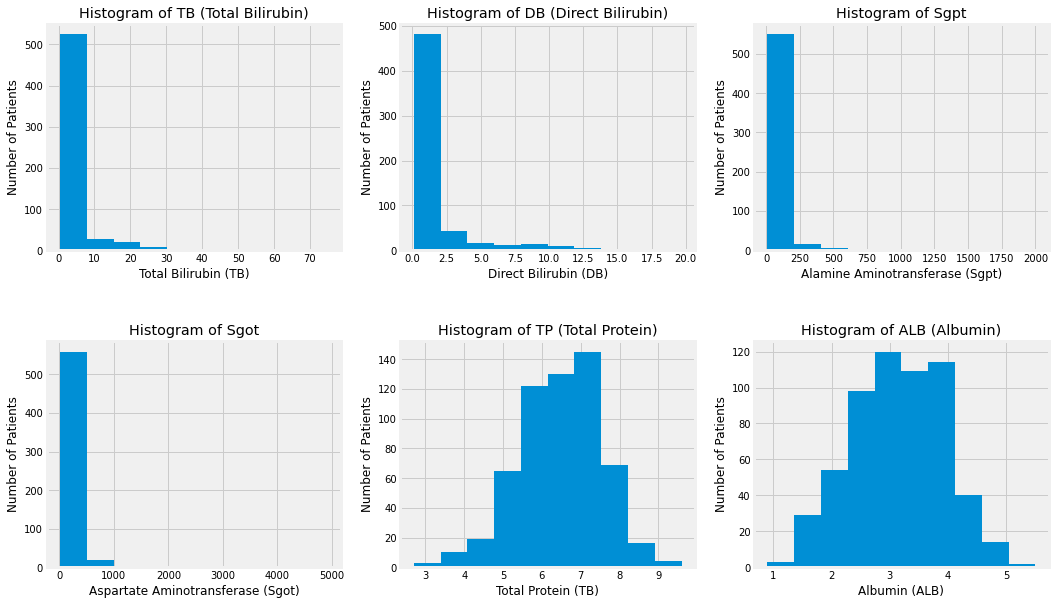

In [21]:
# Membuat subplot

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 10)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0])  
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[1,0]) 
ax4 = fig.add_subplot(ax[1,1])  
ax5 = fig.add_subplot(ax[1,2])  

# Subplot ax[0,0]: TB
df['TB'].plot(kind='hist', ax=ax0) 
ax0.set_title("Histogram of TB (Total Bilirubin)")
ax0.set_ylabel('Number of Patients')
ax0.set_xlabel('Total Bilirubin (TB)')

# Subplot ax[0,1]: DB
df['DB'].plot(kind='hist', ax=ax1) 
ax1.set_title("Histogram of DB (Direct Bilirubin)")
ax1.set_ylabel('Number of Patients')
ax1.set_xlabel('Direct Bilirubin (DB)')

# Subplot ax[0,2]: Sgpt
df['Sgpt'].plot(kind='hist', ax=ax2) 
ax2.set_title("Histogram of Sgpt")
ax2.set_ylabel('Number of Patients')
ax2.set_xlabel('Alamine Aminotransferase (Sgpt)') 

# Subplot ax[1,0]: Sgot
df['Sgot'].plot(kind='hist', ax=ax3) 
ax3.set_title("Histogram of Sgot")
ax3.set_ylabel('Number of Patients')
ax3.set_xlabel('Aspartate Aminotransferase (Sgot)')

# Subplot ax[1,1]: TP
df['TP'].plot(kind='hist', ax=ax4) 
ax4.set_title("Histogram of TP (Total Protein)")
ax4.set_ylabel('Number of Patients')
ax4.set_xlabel('Total Protein (TB)')

# Subplot ax[1,2]: ALB
df['ALB'].plot(kind='hist', ax=ax5) 
ax5.set_title("Histogram of ALB (Albumin)")
ax5.set_ylabel('Number of Patients')
ax5.set_xlabel('Albumin (ALB)')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


